In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


    The column or features in the dataset:
    
    Id
    ProductId — unique identifier for the product
    UserId — unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator — number of users who found the review helpful
    HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
    Score — rating between 1 and 5
    Time — timestamp for the review
    Summary — brief summary of the review
    Text — text of the review

In [ ]:
#### U can check online its table name of "database.sqlite" on https://sqliteonline.com/

In [2]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect('/content/drive/MyDrive/Hands on Python/Data Science Projects/Amazon Customers Data Analysis/database.sqlite')
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [3]:
'''

HelpfulnessDenominator is : people found useful count + people found not so useful count (ie how many people reviewed )
Helpfulnessnumerator is among those how many found it helpful…..consider it like a percentage….

So, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator..


'''

df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]   ## invalid rows
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]  ## valid rows

df_valid[df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])]
### ie , approx 174521 are duplicated .. so u have to remove these duplicate rows ..
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text'])

pd.to_datetime(data['Time'])
### as default is : unix start time "1970-01-01"
### 00:00:01.303862400 ->> by-default this time is in "nano-second" as default value of unit = "ns"
### so lets customize "unit" parameter to get time in second ..
data['Date'] = pd.to_datetime(data['Time'] , unit='s')


data['ProfileName'].nunique()

### Total unique profile-name are 218418
## Note : Profile_Name could be same but User-ID will be different , so lets consider UserID for this analysis ..

data['UserId'].nunique()

## ie total users are 256059

x = data['UserId'].value_counts()
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")
data['year_month'] = pd.to_datetime(data['Date']).dt.to_period('M')


In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,viewer_type,year_month
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Not Frequent,2011-04
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Not Frequent,2012-09
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Not Frequent,2008-08
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Not Frequent,2011-06
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Not Frequent,2012-10


Top 10 buyers 
                 UserId  Number of Products
252275   AY12DBB0U420B                 329
182011  A3OXHLG6DIBRW8                 278
82919   A281NPSIMI1C2R                 259
65586   A1YUL9PCJR3JTY                 214
66162   A1Z54EM24Y40LL                 211
110863  A2MUGFV2TDQ47K                 161
160300  A3D6OI36USYOU1                 146
255806   AZV26LP92E6WU                 129
226943   AKMEY1BSHSDG7                 119
98665   A2GEZJHBV92EVR                 118
Person who purchased the most number of product is  Gary Peterson


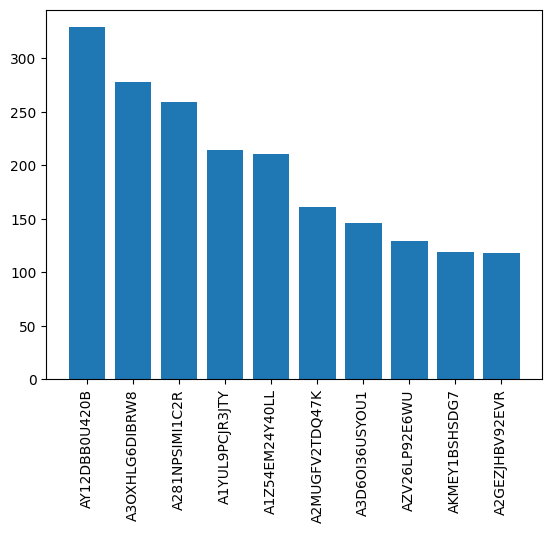

In [21]:
##Users who purchased highest number of products

highest_purchase = data.groupby(['UserId'])['ProductId'].count().reset_index().rename(columns={'ProductId':'Number of Products'})
highest_purchase.sort_values(by=['Number of Products'],ascending=False,inplace=True)
print("Top 10 buyers \n", highest_purchase.head(10))
plt.bar(highest_purchase.head(10)['UserId'],highest_purchase.head(10)['Number of Products'])
plt.xticks(rotation='vertical')

print("Person who purchased the most number of product is ",data[data['UserId']=='AY12DBB0U420B']['ProfileName'].unique()[0])

Top 10 purchases 
         ProductId  Number of Buyers
65070  B007JFMH8M               912
38609  B002QWP89S               630
42176  B003B3OOPA               622
26153  B001EO5Q64               566
21376  B0013NUGDE               558
13215  B000KV61FC               556
15536  B000NMJWZO               542
18106  B000UBD88A               542
60466  B005K4Q37A               541
67391  B0090X8IPM               530


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'B007JFMH8M'),
  Text(1, 0, 'B002QWP89S'),
  Text(2, 0, 'B003B3OOPA'),
  Text(3, 0, 'B001EO5Q64'),
  Text(4, 0, 'B0013NUGDE'),
  Text(5, 0, 'B000KV61FC'),
  Text(6, 0, 'B000NMJWZO'),
  Text(7, 0, 'B000UBD88A'),
  Text(8, 0, 'B005K4Q37A'),
  Text(9, 0, 'B0090X8IPM')])

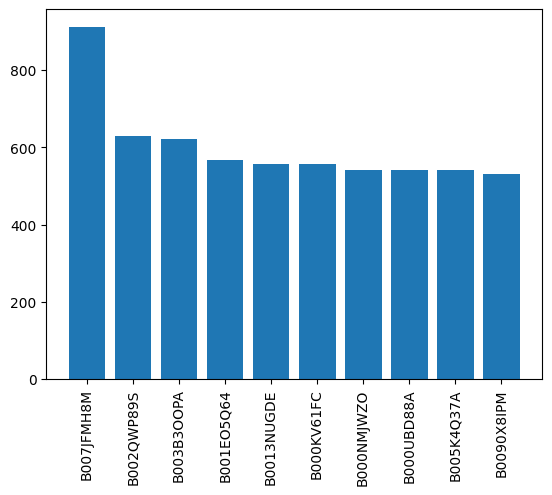

In [23]:
highest_sold_product = data.groupby(['ProductId'])['UserId'].count().reset_index().rename(columns={'UserId':'Number of Buyers'})
highest_sold_product.sort_values(by=['Number of Buyers'],ascending=False,inplace=True)
print("Top 10 purchases \n", highest_sold_product.head(10))
plt.bar(highest_sold_product.head(10)['ProductId'],highest_sold_product.head(10)['Number of Buyers'])
plt.xticks(rotation='vertical')

Distribution of Scores : 
    Score  Number of Products
4      5              250961
3      4               56093
2      3               29769
1      2               20802
0      1               36306


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

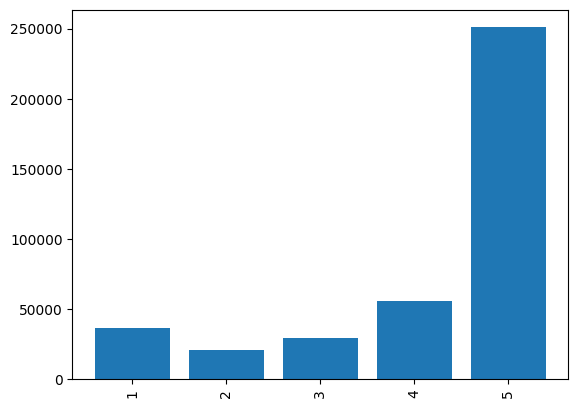

In [40]:
# scores distribution
scores_grouped = data.groupby(['Score'])['ProductId'].count().reset_index().rename(columns={'ProductId':'Number of Products'}).sort_values(by=['Score'],ascending=False)
print("Distribution of Scores : \n", scores_grouped)

plt.bar(scores_grouped['Score'],scores_grouped['Number of Products'])
plt.xticks(rotation='vertical')

In [52]:
#Top 10 products with highest scores
top_20_good_products = data.groupby(['ProductId']).agg(number_of_times_purchased=('ProductId','count'),
                                                       median_score=('Score','median'),
                                                       mean_score=('Score','mean')
                                                       ).reset_index()
top_20_good_products.sort_values(by=['median_score','number_of_times_purchased','mean_score',],ascending=[False,False,False],inplace=True)
top_20_good_products = top_20_good_products.head(20).reset_index(drop=True)
print("Top 20 products with high scores : \n",top_20_good_products)

Top 20 products with high scores : 
      ProductId  number_of_times_purchased  median_score  mean_score
0   B007JFMH8M                        912           5.0    4.582237
1   B002QWP89S                        630           5.0    4.593651
2   B003B3OOPA                        622           5.0    4.741158
3   B001EO5Q64                        566           5.0    4.745583
4   B0013NUGDE                        558           5.0    4.310036
5   B000NMJWZO                        542           5.0    4.881919
6   B000UBD88A                        542           5.0    4.343173
7   B005K4Q37A                        541           5.0    3.817006
8   B005ZBZLT4                        505           5.0    4.362376
9   B000PDY3P0                        486           5.0    4.353909
10  B007TJGY46                        456           5.0    4.256579
11  B004SRH2B6                        456           5.0    3.671053
12  B003VXFK44                        453           5.0    3.938190
13  B0007A0

In [53]:

from textblob import TextBlob

#sample = data[0:50000]
sample = data.copy()
### if u do not have good specifications , then its good to consider sample of data ..


polarity = []

for text in sample['Summary']: # list which will contain the polarity of the Summaries
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)
sample['polarity'] = polarity
sample_negative= sample[sample['polarity']<0]
sample_positive= sample[sample['polarity']>0]

from collections import Counter
print("Most used positve words : \n",pd.DataFrame(Counter(sample_positive['Summary']).most_common(10),columns=['Positive Words','Number Of Times Used'])) ## most used positive keywords
print("\nMost used negative words : \n",pd.DataFrame(Counter(sample_negative['Summary']).most_common(10),columns=['Negative Words','Number Of Times Used'])) ## most used negative keywords

Most used positve words : 
   Positive Words  Number Of Times Used
0     Delicious!                  1768
1      Delicious                  1682
2  Great product                   765
3      Excellent                   713
4       Love it!                   649
5  Great Product                   648
6         Great!                   529
7          Great                   506
8        Awesome                   396
9       Awesome!                   394

Most used negative words : 
         Negative Words  Number Of Times Used
0         Disappointed                   426
1        Disappointing                   223
2  Not what I expected                   143
3                Awful                   120
4         disappointed                   120
5             Horrible                   111
6             Terrible                   107
7           Disgusting                    89
8             Not good                    78
9                Bland                    64
